In [1]:
# importing neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

The dataset has ratings data of 400 movies from 1097 research participants. 

#### The dataset details are as:

- 1st row: Headers (Movie titles/questions)
- Columns 1-400: These columns contain the ratings for the 400 movies (0 to 4, and missing)
- Columns 401-420: These columns contain self-assessments on sensation seeking behaviors (1-5)
- Columns 421-464: These columns contain responses to personality questions (1-5)
- Columns 465-474: These columns contain self-reported movie experience ratings (1-5)
- Column 475: Gender identity (1 = female, 2 = male, 3 = self-described)
- Column 476: Only child (1 = yes, 0 = no, -1 = no response)
- Column 477: Movies are best enjoyed alone (1 = yes, 0 = no, -1 = no response)

In [2]:
#importing the dataset
df=pd.read_csv('C:/Users/Mohan/Desktop/Assignment/movieReplicationSet.csv')
df.head()

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,When watching a movie I cheer or shout or talk or curse at the screen,When watching a movie I feel like the things on the screen are happening to me,As a movie unfolds I start to have problems keeping track of events that happened earlier,"The emotions on the screen ""rub off"" on me - for instance if something sad is happening I get sad or if something frightening is happening I get scared",When watching a movie I get completely immersed in the alternative reality of the film,Movies change my position on social economic or political issues,When watching movies things get so intense that I have to stop watching,Gender identity (1 = female; 2 = male; 3 = self-described),Are you an only child? (1: Yes; 0: No; -1: Did not respond),Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)
0,NaN,NaN,4.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,1.0,6.0,2.0,5.0,5.0,5.0,1.0,1.0,0,1
1,NaN,NaN,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,1.0,1.0,6.0,5.0,3.0,2.0,1.0,0,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,4.0,3.0,5.0,5.0,4.0,4.0,1.0,1,0
3,NaN,NaN,2.0,NaN,3.0,NaN,NaN,NaN,NaN,4.0,...,3.0,1.0,1.0,4.0,5.0,3.0,1.0,1.0,0,1
4,NaN,NaN,3.5,NaN,0.5,NaN,0.5,1.0,NaN,0.0,...,2.0,3.0,2.0,5.0,6.0,4.0,4.0,1.0,1,1


In [3]:
df.shape

(1097, 477)

In [4]:
df.isna().sum()

The Life of David Gale (2003)                                              1021
Wing Commander (1999)                                                      1026
Django Unchained (2012)                                                     644
Alien (1979)                                                                808
Indiana Jones and the Last Crusade (1989)                                   634
                                                                           ... 
Movies change my position on social economic or political issues             20
When watching movies things get so intense that I have to stop watching      18
Gender identity (1 = female; 2 = male; 3 = self-described)                   24
Are you an only child? (1: Yes; 0: No; -1: Did not respond)                   0
Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)            0
Length: 477, dtype: int64

In [5]:
# calculate the column means           # axis = 0 means along the column and axis = 1 means working along the row.
col_means = df.mean(axis=0)

# calculate the row means
row_means = df.mean(axis=1)

In [6]:
# impute the missing values by taking a 50:50 blend of the mean rating for each column and each row.
for i in range(1097):
    for j in range(400):
        if pd.isnull(df.iloc[i,j]):
            df.iloc[i,j] = 0.5 * (col_means[j] + row_means[i])

In [7]:
df.isna().sum()

The Life of David Gale (2003)                                               0
Wing Commander (1999)                                                       0
Django Unchained (2012)                                                     0
Alien (1979)                                                                0
Indiana Jones and the Last Crusade (1989)                                   0
                                                                           ..
Movies change my position on social economic or political issues           20
When watching movies things get so intense that I have to stop watching    18
Gender identity (1 = female; 2 = male; 3 = self-described)                 24
Are you an only child? (1: Yes; 0: No; -1: Did not respond)                 0
Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)          0
Length: 477, dtype: int64

In [8]:
ratings = df.iloc[:, :400]

In [9]:
# initialize the model
model = LinearRegression()

# create a list to store the COD values
cods = []

# loop over the movies
for i in range(400):
    # select the ratings for the current movie
    X = ratings.iloc[:, np.arange(400) != i].values
    # select the ratings of the current movie as the target variable
    y = ratings.iloc[:, i].values
    # fit the model
    model.fit(X, y)
    # make predictions
    y_pred = model.predict(X)
    # calculate the COD
    cod = r2_score(y, y_pred)
    #print('r2 score for perfect model is', cod)
    cods.append(cod)

In [10]:
# calculate the average COD
avg_cod = np.mean(cods)

# print the average COD
print("Average COD:", avg_cod)

Average COD: 0.7981019552674633


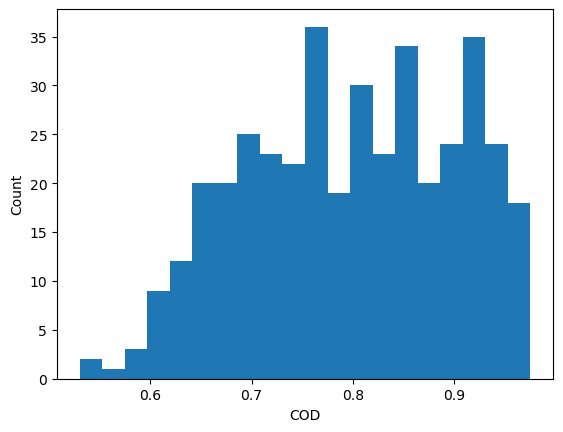

In [11]:
# Create a histogram of the COD values
plt.hist(cods, bins=20)
plt.xlabel("COD")
plt.ylabel("Count")
plt.show()